<a href="https://colab.research.google.com/github/ciepielajan/SDA_SMOG_Wawelski/blob/main/Jan/Krakow_siatka_punktow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
!pip -q install folium

In [180]:
import pandas as pd
import folium

Generuje data frame z punktami . \
Wyznaczam punkt od ktrego pętla ma zaczać wyznaczanie kolejne koordynaty.  \
Niestety ręcznie trzeba wskazać ile puktów ma być. Nie potrafie zrobić tego dla konkretnej odległości np co 500m 

In [181]:
left_top_corner =  [50.107 ,19.82]

df = pd.DataFrame()

for i in range(45):
  id_i = str(i+1) 
  i = i * 0.00463  # im mniejsza wartość tym bliższe odległości od kolejnego punktu
  for x in range(35):
    id = id_i + "-" + str(x+1)
    x = x * 0.00297      # im mniejsza wartość tym bliższe odległości od kolejnego punktu
    lat = left_top_corner[0] - x
    lon = left_top_corner[1] + i
    pm10= 232
    df = df.append({"id":id,"Latitude":lat,"Longitude":lon,"PM10":pm10},ignore_index=True)

df

,Latitude,Longitude,PM10,id
0,50.10700,19.82000,232.0,1-1
1,50.10403,19.82000,232.0,1-2
2,50.10106,19.82000,232.0,1-3
3,50.09809,19.82000,232.0,1-4
4,50.09512,19.82000,232.0,1-5
...,...,...,...,...
1570,50.01790,20.02372,232.0,45-31
1571,50.01493,20.02372,232.0,45-32
1572,50.01196,20.02372,232.0,45-33
1573,50.00899,20.02372,232.0,45-34


Generuje Okrąg

In [182]:
location = [50.0614 ,19.9366]

m = folium.Map(location=location, zoom_start=17)

for ind in df.index: 
    tooltip_txt = 'Sektor ID: ' +df['id'][ind] + '<br>PM10:' + str(df['PM10'][ind])
    folium.Circle(
          location=[float(df['Latitude'][ind]), float(df['Longitude'][ind])], 
          radius=165,
          # popup="Laurelhurst Park",
          color="#3186cc",
          # fill=True,
          fill_color="#3186cc",
          tooltip= tooltip_txt
      ).add_to(m)
m

In [64]:
m.save("index.html")

próba przerobienia okręgłów na kwadraty. Jest to o tyle problematycznne że zamiast POINT ( lat, long) konieczne jest zrobienie Polygon (zbioru 4 punktów).

W późniejszym kroku chciałbym zastosować Choropleth

In [202]:
!pip -q install geopandas

In [210]:
import geopandas

In [184]:
df[:3]

,Latitude,Longitude,PM10,id
0,50.10700,19.82,232.0,1-1
1,50.10403,19.82,232.0,1-2
2,50.10106,19.82,232.0,1-3


In [81]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
gdf[:3]

,Latitude,Longitude,PM10,id,geometry
0,50.10700,19.82,232.0,1-1,POINT (19.82000 50.10700)
1,50.10403,19.82,232.0,1-2,POINT (19.82000 50.10403)
2,50.10106,19.82,232.0,1-3,POINT (19.82000 50.10106)


In [185]:
from shapely.geometry import Polygon

In [239]:
szer = 	50.10700	 - 	50.10403	
szer

0.0029699999999976967

In [240]:
wys =   19.82 - 19.82463
wys

-0.004629999999998802

In [241]:
pg = [ 50.10700 , 19.82463]
lg =  [50.10700  , 19.82463 + szer]
pd = [ 50.10700 - wys, 19.82463 ]
ld = [50.10700 - wys , 19.82463 + szer]

In [242]:
point_list = [pg,lg,pd,ld]
point_list

[[50.107, 19.82463],
 [50.107, 19.827599999999997],
 [50.11163, 19.82463],
 [50.11163, 19.827599999999997]]

In [232]:
from shapely.geometry import Polygon

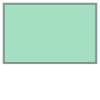

In [243]:
Polygon([pg,lg,ld,pd])

In [244]:
def get_square(gdf):
  lat = gdf["Latitude"]
  lon = gdf["Longitude"]
  pg = [ lat , lon]
  lg =  [ lat  , lon + szer]
  pd = [ lat - wys, lon ]
  ld = [ lat - wys , lon + szer]
  return Polygon([pg,lg,ld,pd])

In [245]:
df2 = df

In [246]:
df2["geometry"] = df2[["Latitude","Longitude"]].apply( get_square, axis=1)
df2[:3]

,Latitude,Longitude,PM10,id,geometry
0,50.10700,19.82,232.0,1-1,"POLYGON ((50.107 19.82, 50.107 19.82297, 50.11..."
1,50.10403,19.82,232.0,1-2,"POLYGON ((50.10403 19.82, 50.10403 19.82297, 5..."
2,50.10106,19.82,232.0,1-3,"POLYGON ((50.10106 19.82, 50.10106 19.82297, 5..."


In [247]:
gdf2 = geopandas.GeoDataFrame(df2, crs="EPSG:4326")
gdf2

,Latitude,Longitude,PM10,id,geometry
0,50.10700,19.82000,232.0,1-1,"POLYGON ((50.10700 19.82000, 50.10700 19.82297..."
1,50.10403,19.82000,232.0,1-2,"POLYGON ((50.10403 19.82000, 50.10403 19.82297..."
2,50.10106,19.82000,232.0,1-3,"POLYGON ((50.10106 19.82000, 50.10106 19.82297..."
3,50.09809,19.82000,232.0,1-4,"POLYGON ((50.09809 19.82000, 50.09809 19.82297..."
4,50.09512,19.82000,232.0,1-5,"POLYGON ((50.09512 19.82000, 50.09512 19.82297..."
...,...,...,...,...,...
1570,50.01790,20.02372,232.0,45-31,"POLYGON ((50.01790 20.02372, 50.01790 20.02669..."
1571,50.01493,20.02372,232.0,45-32,"POLYGON ((50.01493 20.02372, 50.01493 20.02669..."
1572,50.01196,20.02372,232.0,45-33,"POLYGON ((50.01196 20.02372, 50.01196 20.02669..."
1573,50.00899,20.02372,232.0,45-34,"POLYGON ((50.00899 20.02372, 50.00899 20.02669..."


In [248]:
type(gdf2)

geopandas.geodataframe.GeoDataFrame

In [249]:
location = [50.0614 ,19.9366]

m = folium.Map(location=location, zoom_start=10)

folium.GeoJson(gdf2).add_to(m)
m